<a href="https://colab.research.google.com/github/zulfahnh/Java_8_Basic_Programming/blob/main/Data_Science_in_Marketing_Customer_Segmentation_with_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kmodes

# **PART 1**

**Introduction**

Ceritanya Perusahaan sedang berusaha untuk mengenal lebih baik pelanggan nya. Tujuannya agar perusahaan dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap tiap pelanggan dan memberikan rekomendasi untuk menyelesaikan permasalahan tersebut.

Salah satu teknik yang bisa dilakukan untuk mengenal lebih baik pelanggan kamu 
adalah dengan melakukan segmentasi pelanggan. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut kamu akan menggunakan teknik unsupervised machine learning.

Salah satunya teknik yang dapat digunakan adalah pengaplikasian machine learning menggunakan algoritma K-Prototypes.  Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat di gunakan untuk melakukan segmentasi dengan data.

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
  
from kmodes.kmodes import KModes 
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path 

In [ ]:
# import dataset  
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")  
  
# menampilkan data  
print(df.head())


  Customer_ID       Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-001         Budi Anggara  ...       Sector              9497927
1    CUST-002     Shirley Ratuwati  ...      Cluster              2722700
2    CUST-003         Agus Cahyono  ...      Cluster              5286429
3    CUST-004     Antonius Winarta  ...      Cluster              5204498
4    CUST-005  Ibu Sri Wahyuni, IR  ...      Cluster             10615206

[5 rows x 7 columns]


In [ ]:
# Menampilkan informasi data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


**Eksplorasi Data Numerik**

Pertama perlu melihat distribusi data dari data yang berjenis numerik. Disini kami akan menggunakan boxplot dan juga histogram untuk melihat distribusi datanya. Untuk membuat grafik tersebut, kami perlu menyiapkan kolom mana yang merupakan kolom numerik. Kemudian menggunakan library seaborn untuk membuat plot masing-masing kolom numerik, yaitu 'Umur' dan 'NilaiBelanjaSetahun'.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

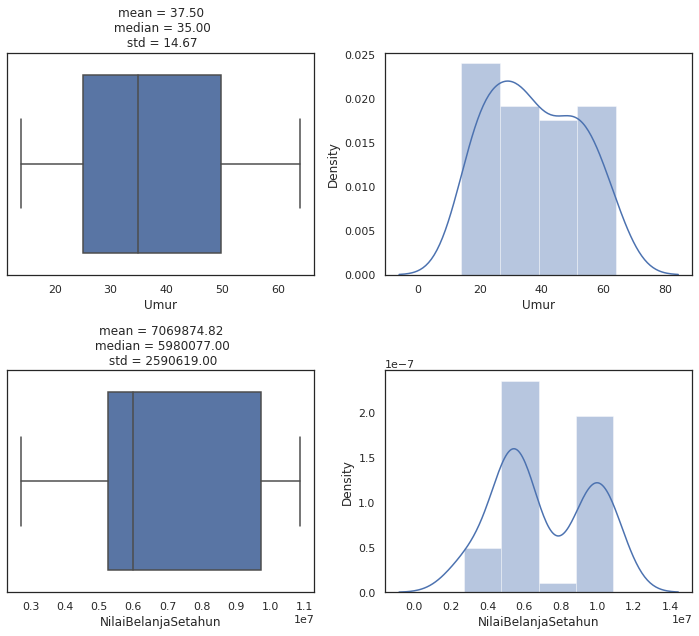

In [ ]:
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik)

**Eksplorasi Data Kategorikal**

Selain data numerikal perlu melihat bagaimana persebaran data pada kolom-kolom yang memiliki jenis kategorikal yaitu Jenis Kelamin, Profesi dan Tipe Residen. hal ini dapat diselesaikan dengan menggunakan countplot dari library seaborn.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: ignored

<Figure size 432x288 with 0 Axes>

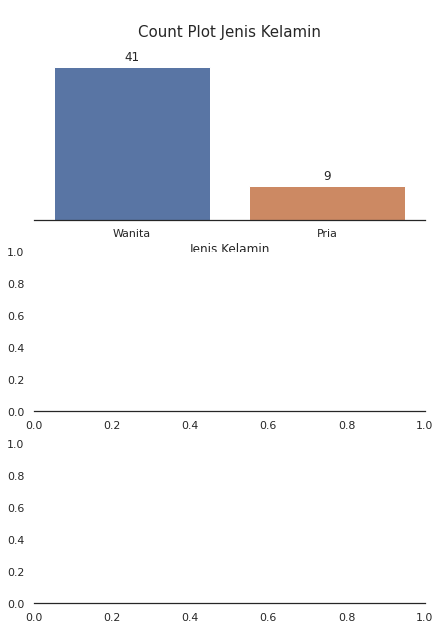

In [ ]:
sns.set(style='white')
plt.clf()
  
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index,ax= axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(ax)
    plt.tight_layout()

# Tampilkan plot
plt.show()

**Standarisasi Kolom Numerik**

Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, kita perlu menjadikan data-data numerik yang kamu miliki berada pada satu skala. Hal ini dapat di lakukan dengan melakukan standardisasi data yang dimiliki. 

Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan di bentuk dan juga tiap variabel akan di anggap sama pentingnya oleh algoritma yang akan di gunakan.

In [ ]:
from sklearn.preprocessing import StandardScaler  
  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  


Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


**Konversi Kategorikal Data dengan Label Encoder**

Selanjutnya merubah kolom-kolom yang berjenis kategorikal menjadi angka menggunakan salah satu fungsi dari sklearn yaitu **LabelEncoder**. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik.

Sebagai contoh untuk kolom Jenis Kelamin, teks "Pria" akan dirubah menjadi angka 0 dan teks "Wanita" akan di rubah menjadi angka satu. Perubahan ini perlu kita untuk semua teks sebelum di gunakan pada algoritma K-Prototype.

In [ ]:
from sklearn.preprocessing import LabelEncoder
  
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy() 
  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head())


   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


**Menggabungkan Data untuk Permodelan**

Setelah menyelesaikan dua tahap sebelumnya, dilakukan penggabungan kedua hasil pemrosesan tersebut menjadi satu data frame. Data frame ini yang akan di gunakan untuk permodelan.

In [ ]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
print(df_model.head())


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


# PART 2

**Mencari Jumlah Cluster yang Optimal**

Salah satu parameter penting yang harus di masukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunnakan bantuan 'elbow plot'.

Elbow plot ini dapat di buat dengan cara  memvisualisasikan total jarak seluruh data kita ke pusat cluster nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

Untuk melakukan hal ini kamu perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya kamu juga menyimpan nilai cost_ dan memvisualisasikan nya dengan line plot atau point plot.

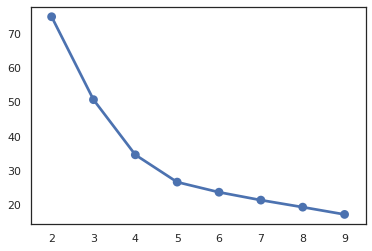

In [ ]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
df_model = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()


**Membuat Model**

In [ ]:
import pickle 
from kmodes.kmodes import KModes 
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes( n_clusters = 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  


Menggunakan model tersebut untuk menentukan segmen pelanggan yang ada di data set.

In [ ]:
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
print(df_final.head(10))  

segmen pelanggan: [1 2 4 4 0 3 1 4 3 3 4 4 1 1 0 3 3 4 0 2 0 4 3 0 0 4 0 3 4 4 2 1 2 0 3 0 3
 1 3 2 3 0 3 0 3 0 4 1 3 1]

  Customer_ID         Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0    CUST-001           Budi Anggara  ...             9497927        1
1    CUST-002       Shirley Ratuwati  ...             2722700        2
2    CUST-003           Agus Cahyono  ...             5286429        4
3    CUST-004       Antonius Winarta  ...             5204498        4
4    CUST-005    Ibu Sri Wahyuni, IR  ...            10615206        0
5    CUST-006        Rosalina Kurnia  ...             5215541        3
6    CUST-007          Cahyono, Agus  ...             9837260        1
7    CUST-008         Danang Santosa  ...             5223569        4
8    CUST-009  Elisabeth Suryadinata  ...             5993218        3
9    CUST-010         Mario Setiawan  ...             5257448        3

[10 rows x 8 columns]


**Menampilkan Cluster Tiap Pelanggan**

In [ ]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])



Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
4     CUST-005  Ibu Sri Wahyuni, IR  ...            10615206        0
14    CUST-015     Shirley Ratuwati  ...            10365668        0
18    CUST-019         Mega Pranoto  ...            10884508        0
20    CUST-021     Lestari Fabianto  ...             9222070        0
23    CUST-024        Putri Ginting  ...            10259572        0
24    CUST-025       Julia Setiawan  ...            10721998        0
26    CUST-027        Grace Mulyati  ...             9114159        0
33    CUST-034       Deasy Arisandi  ...             9759822        0
35    CUST-036       Ni Made Suasti  ...             9678994        0
41    CUST-042         Yuliana Wati  ...             9880607        0
43    CUST-044                 Anna  ...             9339737        0
45    CUST-046         Elfira Surya  ...            10099807        0

[12 rows x 8 columns]

Pelanggan cluster: 1

   Customer_ID    Nam

**Visualisasi Hasil Clustering - Box Plot**

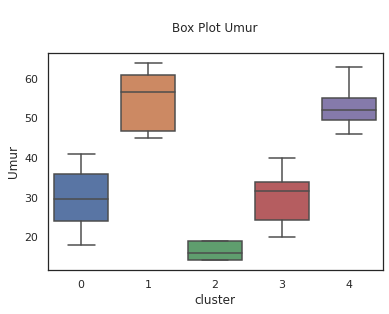

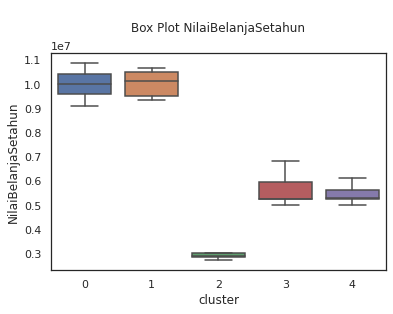

In [ ]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

**Visualisasi Hasil Clustering - Count Plot**

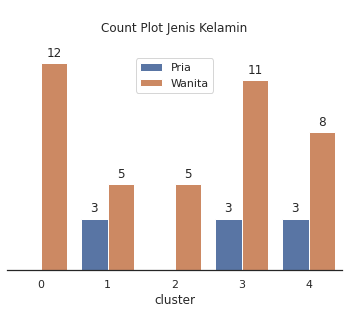

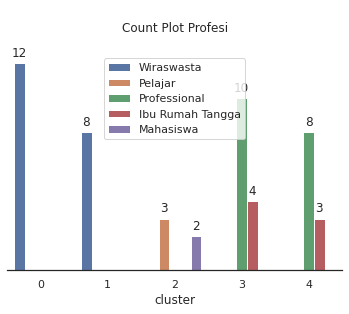

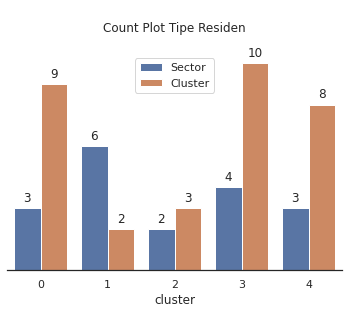

In [ ]:
import matplotlib.pyplot as plt  
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final , x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


**Menamakan Cluster**

Dari hasil observasi yang dilakukan maka dapat memberikan nama segmen dari tiap tiap nomor kluster nya. Yaitu:

- Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.

- Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswata yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.

- Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.

- Cluster 3: Gold Young Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahun nya mendekati 6 juta.

- Cluster 4: Gold Senior Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahun nya mendekati 6 juta.

In [ ]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head(10))  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID         Nama Pelanggan  ... cluster                 segmen
0    CUST-001           Budi Anggara  ...       1  Diamond Senior Member
1    CUST-002       Shirley Ratuwati  ...       2          Silver Member
2    CUST-003           Agus Cahyono  ...       4     Gold Senior Member
3

**Mempersiapkan Data Baru**

bagian ini merupakan pengecekan dengan membuat contoh data baru untuk di prediksi dengan model yang sudah di buat. Hal ini dilakukan dengan membuat satu buah dataframe yang berisi informasi pelanggan.

In [ ]:
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df) 

  Customer_ID Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-100           Joko  ...      Cluster              8230000

[1 rows x 7 columns]


**Membuat Fungsi Data Pemrosesan**

In [ ]:
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model) 


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


**Memanggil Model dan Melakukan Prediksi**

In [ ]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters= kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)  


[1]


In [ ]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()
	  final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen(new_df,clusters)
  
print(new_final_df)  

TabError: ignored